In [18]:
import pandas as pd
import numpy as np
import seaborn as snn

In [4]:
df = pd.read_csv(r'\Users\KAYEG\Documents\ASU\FALL - 21 - Term 7\Machine Learning\Project\Project\data.csv', index_col=0)

In [7]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [9]:
def min_max(series, operation):
    try:
        if(operation == 'min'):
            return series.min()
        return series.max()
    except TypeError:
        return 'N/A'

In [16]:
def create_overview(df):
    overview_df = pd.DataFrame()
    
    overview_df['column_name'] = df.columns
    overview_df['values'] = df.iloc[0,:].values
    overview_df['data_type'] = df.dtypes.values
    overview_df['null_count'] = df.isnull().sum().values
    overview_df['null_count_percent'] = 100 * df.isnull().sum().values /df.shape[0]
    overview_df['min_value'] = df.apply(lambda x: min_max(x, 'min')).values
    overview_df['max_value'] = df.apply(lambda x: min_max(x, 'max')).values
    print("Shape :", df.shape)
    return overview_df

In [17]:
create_overview(df)

Shape : (863, 14)


,column_name,values,data_type,null_count,null_count_percent,min_value,max_value
0,location,104.0,int64,0,0.0,0.0,138.0
1,country,8.0,int64,0,0.0,0.0,33.0
2,gender,1.0,int64,0,0.0,0.0,2.0
3,age,66.0,float64,0,0.0,2.0,96.0
4,vis_wuhan,1.0,int64,0,0.0,0.0,1.0
5,from_wuhan,0.0,int64,0,0.0,0.0,1.0
6,symptom1,14.0,int64,0,0.0,0.0,24.0
7,symptom2,31.0,int64,0,0.0,0.0,31.0
8,symptom3,19.0,int64,0,0.0,0.0,19.0
9,symptom4,12.0,int64,0,0.0,0.0,12.0


<AxesSubplot:ylabel='Frequency'>

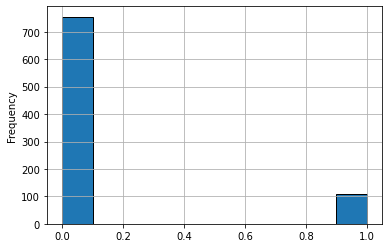

In [34]:
df['result'].plot(kind='hist', edgecolor='k', grid=True)

<AxesSubplot:ylabel='Frequency'>

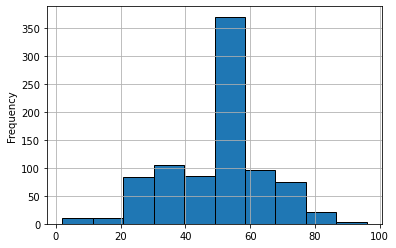

In [33]:
df['age'].plot(kind='hist', edgecolor='k', grid=True)